In [1]:
import twint
import nest_asyncio
nest_asyncio.apply()
import pandas as pd
import re

from wordcloud import WordCloud, STOPWORDS
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

print("Done!")

Done!


In [ ]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

def cleanMentions(text):
  text = re.sub(r'@[A-Za-z0-9_-]+' + ':?', '', text)
  return text

def cleanHT(text):
  text = re.sub(r'#', '', text)
  return text

def cleanRT(text):
  text = re.sub(r'RT[\s]+', '', text)
  return text

def cleanWeb(text):
  text = re.sub(r'https?:\/\/\S+', '', text)
  return text

print("Done!")

In [ ]:
# Parámetros a introducir y a los que se rige. No funcionan muy bien, sobre todo el de lenguaje. Habría que limpiar posteriormente la columna "language" de aquellos que no coincidan con "es"
c = twint.Config()
c.Search = "elegir carrera"
c.Lang = "es"
c.Store_csv = True
c.Filter_retweets = True
c.Limit = 5000
c.Since = "2022-03-01"
c.Output = "tuits.csv"

In [ ]:
twint.run.Search(c)

In [ ]:
df = pd.read_csv("tuits.csv")
tuits = df["tweet"]

with open("tuits.txt", "a", encoding="utf-8") as f:
    for tuit in tuits:
        tuit_limpio_emojis = remove_emoji(tuit)
        tuit_limpio_menciones = cleanMentions(tuit_limpio_emojis)
        tuit_limpio_HT = cleanHT(tuit_limpio_menciones)
        tuit_limpio_RT = cleanRT(tuit_limpio_HT)
        tuit_limpio_Web = cleanWeb(tuit_limpio_RT)
        
        f.write(tuit_limpio_Web)
        
print("Done!")
    

In [2]:
txt = open("tuits.txt", "r", encoding="utf-8").read()

In [3]:
len(txt)

102754

In [ ]:
plt.style.use('fivethirtyeight')

In [4]:
from nltk import sent_tokenize
frases = sent_tokenize(txt)

from nltk import WordPunctTokenizer
tokenizer = WordPunctTokenizer()
tokens = tokenizer.tokenize(txt)
print(tokens)

['Confirmo', 'mi', 'BadDecisions', 'fue', 'elegir', 'una', 'carrera', 'al', 'último', 'momento', 'porque', 'nada', 'me', 'convencióCasi', 'siempre', 'me', 'pregunto', ',', 'que', 'fue', 'lo', 'que', 'llevo', 'a', 'la', 'pequeña', 'Ro', 'q', 'elegir', 'esta', 'carrera', '.', 'Si', 'hubiese', 'elegido', 'el', 'prof', 'de', 'educación', 'física', '...', 'no', 'se', 'quien', 'dijo', 'que', 'teníamos', 'que', 'elegir', 'una', 'carrera', 'a', 'los', '17', 'años', 'pero', 'la', 'puta', 'madreporq', 'no', 'puedo', 'elegir', 'una', 'carrera', 'más', 'fácil', '?', 'que', 'dificil', 'esto', 'de', 'elegir', 'una', 'carrerano', 'se', 'que', 'mierda', 'va', 'a', 'ser', 'de', 'mi', 'sabiendo', 'que', 'quedan', '4', 'meses', 'para', 'terminar', 'el', 'colegio', 'y', 'elegir', 'una', 'carrerafácil', 'elegir', 'carrera', 'con', '17', 'dejaq', 'difícil', 'es', 'elegir', 'alguna', 'carrera', 'q', 'me', 'guste', 'Que', 'momento', 'difícil', 'este', 'cuando', 'tenés', 'que', 'elegir', 'que', 'carrera', 'seg

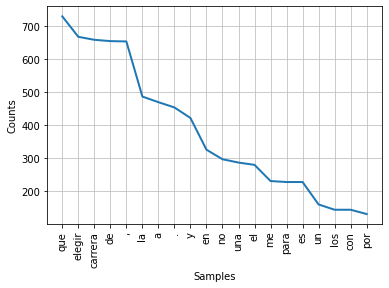

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [5]:
from nltk import FreqDist
frecuencias = FreqDist(tokens)
masFrecuentes = frecuencias.most_common(50)

""""for key, value in frecuencias.items():
    print(f"{key}: {value}")"""

frecuencias.plot(20, cumulative = False)

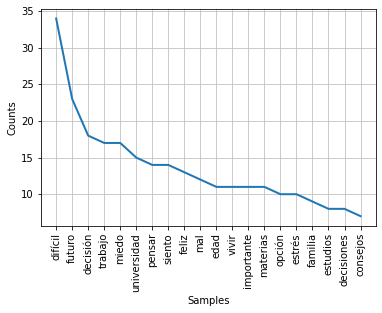

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [91]:
newTokens = []
for tok in tokens:
    if tok.isalpha() == True:
        newTokens.append(tok)
    else:
        continue
list_stopwords = ["q", "si", "elegir", "carrera", "estudiar", "ser", "años", "voy", "vida", "mejor", "solo", "tener", "tan", "ahora", "puede", "vez", "tiempo", "cómo", "bien", "quiero", "va", "cada", "universitaria", "seguir", "año", "ver", "así", "siempre", "toda", "dos", "hacer", "hoy", "debe", "sé", "equipo", "momento", "mas", "gusta", "día", "cosa", "último", "puedo", "mierda", "saber", "hace", "aún", "alonso", "trabajar", "peor", "veces", "poder", "fácil", "hora", "cualquier", "cosas", "puedes", "alguien", "verdad", "gracias", "pq", "profesional", "días", "después", "gran", "próxima", "menos", "aunque", "nunca", "primero", "sabemos", "iba", "d", "primera", "igual", "luego", "mundo", "carreras", "pueden", "dios", "hizo", "mismo", "piloto", "quiere", "gana", "arte", "medicina", "derecho", "aquí", "final", "educación", "meses", "alguna", "guste", "laboral", "da", "hecho", "sacar", "buena", "sólo", "sabe", "falta", "dar", "punto", "gente", "estudiando", "vas", "nadie", "cuál", "ir", "cuenta", "gobernará", "veo", "ve", "m", "van", "claro", "sino", "creo", "hijos", "ganar", "política", "candidato", "partido", "idea", "sido", "pueda", "hice", "medio", "hacia", "todas", "podía", "pensando", "persona", "quieren", "quieres", "resto", "entonces", "manera", "bueno", "parece", "truss", "victoria", "conservador", "reino", "unido", "puta", "debes", "quién", "sabes", "tema", "usted", "personas", "lugar", "partidos", "historia", "diseño", "k", "importantes", "verga", "quería", "hará", "amigo", "país", "crisis", "alpine"]      
from nltk.corpus import stopwords
esStopwords = stopwords.words("spanish")
for word in list_stopwords:
    esStopwords.append(word)
tokens = [tok.lower() for tok in tokens if tok.isalpha() and tok not in esStopwords]
#print(tokens)
frecuencia = FreqDist(tokens)
frecuencia.plot(20, cumulative = False)

In [92]:
txt_nuevo = " ".join(tokens)
print(txt_nuevo)

confirmo baddecisions convenciócasi pregunto llevo pequeña ro elegido prof física dijo madreporq dificil carrerano sabiendo quedan terminar colegio carrerafácil dejaq difícil difícil tenés metiendo presión lados complicado equivoqué plan cogí pasión cogido mindset dedicar libre pasiones agobio realización etc malconvoyvslabasura preguntando joaquin phoenix mal papeles manchar legado respuesta robert niro alpacino difícil aweonao supone schalper chahuan entró palos camilita peluche flores gaspar rivas mató epico nazi derechamiserable apruebocreceme encontrar albums carreraese delicado laburando terminar xddios difícil oye triste partir mitad colegas metros objetividad signo capacidades tal principal dejarte llevar dogmas ponga sobra elijan harán políticos juez derechas jueces izquierdas puedan joderle dictado sentencia acceso judicialmomentos tensión cuales pro estudiala regué brutal eligiendo administración pública ciencias políticas wuey pinches dividieron facus especialidad estrése p

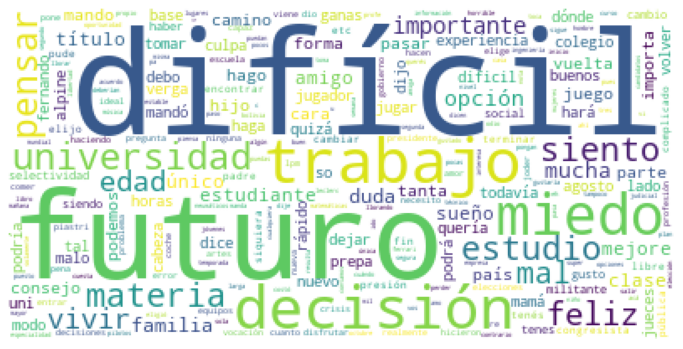

In [117]:
txt_nube = WordCloud(background_color = 'white', max_words = len(txt_hola), stopwords=esStopwords)

txt_nube.generate(txt_nuevo)

fig, ax = plt.subplots(figsize=(12,12))
ax.imshow(txt_nube)
ax.axis('off')
plt.show()

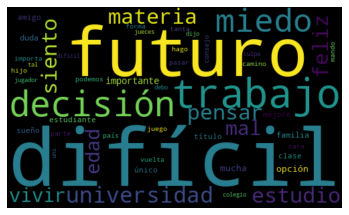

In [115]:
txt_nube = WordCloud(max_words=50, width = 500, height = 300, random_state = 21, max_font_size =119, stopwords=esStopwords)

txt_nube.generate(txt_nuevo)

plt.imshow(txt_nube, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [116]:
txt_nube.to_file("wordcloud.png")